In [13]:
import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [14]:
def plot (history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [15]:
base_dir = '/Users/anasarodake/DataSpell/UnI-ML-DL/video_Ki/images'
classes = ['smile' , 'neutral']

In [16]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [17]:
IMG_SHAPE = 250

batch_size =50

image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    #zoom_range=0.5,
    horizontal_flip=True,
    #width_shift_range=0.15,
    #height_shift_range=0.15
)

train_data_gen = image_gen.flow_from_directory(
    directory=train_dir,
    shuffle=True,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= batch_size,
    class_mode='sparse',
    classes=classes
)

Found 2176 images belonging to 2 classes.


In [18]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [19]:
#dieser ablock sucht nach Bildern, die evtl. einen Fehler bei ber Implimentierung verursachen und zeigt sie auf
import PIL
from pathlib import Path
path = Path(train_dir).rglob("*.jpeg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
        print(img_p)

In [20]:
image_gen = ImageDataGenerator(
    rescale=1./255
)


val_data_gen =  image_gen.flow_from_directory(
    directory=val_dir,
    classes=classes,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= batch_size,
    class_mode= 'sparse')

Found 354 images belonging to 2 classes.


In [21]:
image_gen = ImageDataGenerator(
    rescale=1./255
)


test_data_gen =  image_gen.flow_from_directory(
    directory=test_dir,
    classes=classes,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= batch_size,
    class_mode= 'sparse')




Found 1058 images belonging to 2 classes.


In [22]:
model = Sequential()

model.add(Conv2D(64,3,3 , padding='same' , input_shape=(IMG_SHAPE, IMG_SHAPE, 3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(64, 3,3 ,padding='same' , activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

#model.add(Conv2D(16, 3 ,padding='same' , activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))





model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dropout(0.2))
model.add(Dense(264 ,  activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(264 ,  activation='relu'))




model.add(Dense(2, activation='softmax'))

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [24]:
#from tensorflow.python.keras.callbacks import EarlyStopping
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss' , patience= 3 , verbose=1)

epochs = 35
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))), #alle Bilder / 10
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size))),
    #callbacks=[callback]
)

Epoch 1/35


2022-04-27 09:03:39.714912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - ETA: 0s - loss: 0.7005 - accuracy: 0.4954

2022-04-27 09:04:00.077858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 22s 475ms/step - loss: 0.7005 - accuracy: 0.4954 - val_loss: 0.6932 - val_accuracy: 0.4887
Epoch 2/35
44/44 [==============================] - 20s 448ms/step - loss: 0.6932 - accuracy: 0.5051 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/35
44/44 [==============================] - 20s 449ms/step - loss: 0.6939 - accuracy: 0.5188 - val_loss: 0.6927 - val_accuracy: 0.4944
Epoch 4/35
44/44 [==============================] - 20s 451ms/step - loss: 0.6945 - accuracy: 0.5202 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 5/35
44/44 [==============================] - 20s 451ms/step - loss: 0.6862 - accuracy: 0.5565 - val_loss: 0.6833 - val_accuracy: 0.5000
Epoch 6/35
44/44 [==============================] - 20s 453ms/step - loss: 0.6633 - accuracy: 0.5744 - val_loss: 0.6133 - val_accuracy: 0.7147
Epoch 7/35
44/44 [==============================] - 20s 453ms/step - loss: 0.6305 - accuracy: 0.6255 - val_loss: 0.5630 - val_accuracy: 0.7090
Epoch 8/35

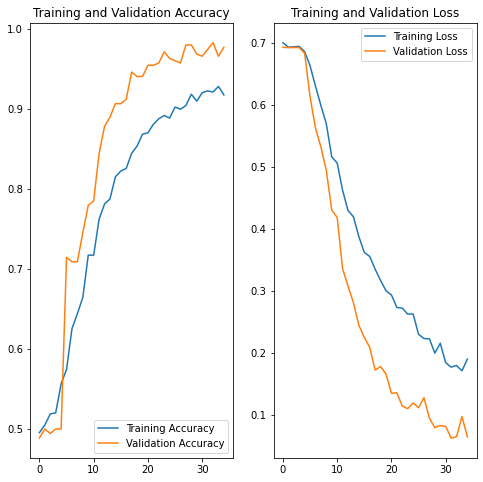

In [25]:
plot(history)

In [26]:
evaluated = model.evaluate(
    x = test_data_gen)

22/22 [==============================] - 3s 121ms/step - loss: 0.0626 - accuracy: 0.9858


In [27]:
predict_dir_smile = os.path.join(base_dir, 'test/smile')

image_gen = ImageDataGenerator(
    rescale=1./255
)


predict_smile_data_gen =  image_gen.flow_from_directory(
    directory=predict_dir_smile,
    classes = classes,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= 528,
    class_mode= 'sparse'
)



predicted_smile = model.predict(x = predict_smile_data_gen)



for value in predicted_smile:
    print("\nLächeln Bild, die KI Werte:    lachen:{}      Neutral:{}".format( round(value[0] *100 , 2) ,round(value[1] *100) ) , "   richtig geschätzt:  " ,  (value[0] > value[1]) )

Found 528 images belonging to 2 classes.


2022-04-27 09:15:34.734428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Lächeln Bild, die KI Werte:    lachen:86.99      Neutral:13    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:74.77      Neutral:25    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.75      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:98.26      Neutral:2    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:98.37      Neutral:2    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:97.8      Neutral:2    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:82.82      Neutral:17    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:91.29      Neutral:9    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:99.77      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die 

In [28]:
index = 0
false_images = np.array([])
for value in predicted_smile:
    if value[0] < value[1]:
        print("falsch geschätztes BILD:    lachen: {}      Neutral: {}        Bild_Index: {}".format( round(value[0] *100 , 2) ,round(value[1] *100) , index ))
        false_images = np.append(false_images , int(index))
    index = index+1



falsch geschätztes BILD:    lachen: 47.47      Neutral: 53        Bild_Index: 130
falsch geschätztes BILD:    lachen: 37.69      Neutral: 62        Bild_Index: 276
falsch geschätztes BILD:    lachen: 48.92      Neutral: 51        Bild_Index: 333
falsch geschätztes BILD:    lachen: 45.33      Neutral: 55        Bild_Index: 452


In [29]:
print("zahl der Falsch geschätzten Bilder: " , len(false_images), " von : ", len (predicted_smile))
evaluated = model.evaluate(
    x = predict_smile_data_gen)

zahl der Falsch geschätzten Bilder:  4  von :  528
1/1 [==============================] - 2s 2s/step - loss: 0.0647 - accuracy: 0.9924


In [30]:
#for pic in false_images:
#    augmented_images = [predict_smile_data_gen[0][0][int(pic)] for i in range(5)]
#    plotImages(augmented_images)

In [31]:
predict_dir = os.path.join(base_dir, 'test/neutral')

image_gen = ImageDataGenerator(
    rescale=1./255
)


predict_neutral_data_gen =  image_gen.flow_from_directory(
    directory=predict_dir,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= 530,
    class_mode= 'sparse')



predicted = model.predict(x = predict_neutral_data_gen)
for value in predicted:
    print("Neutrales Bild, die KI Werte:   lachen:{}      Neutral:{}".format( round(value[0] *100 , 2) ,round(value[1] *100) ))

Found 530 images belonging to 1 classes.
Neutrales Bild, die KI Werte:   lachen:1.08      Neutral:99
Neutrales Bild, die KI Werte:   lachen:0.17      Neutral:100
Neutrales Bild, die KI Werte:   lachen:11.53      Neutral:88
Neutrales Bild, die KI Werte:   lachen:0.07      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.21      Neutral:100
Neutrales Bild, die KI Werte:   lachen:15.09      Neutral:85
Neutrales Bild, die KI Werte:   lachen:4.35      Neutral:96
Neutrales Bild, die KI Werte:   lachen:0.11      Neutral:100
Neutrales Bild, die KI Werte:   lachen:1.6      Neutral:98
Neutrales Bild, die KI Werte:   lachen:4.22      Neutral:96
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:4.32      Neutral:96
Neutrales Bild, die KI Werte:   lachen:0.83      Neutral:99
Neutrales Bild, die KI Werte:   lachen:60.84      Neutral:39
Neutrales Bild, die KI Werte:   lachen:0.0      Neutral:100
Neutrales Bild, die KI Werte:   lachen:1.5      Neutr

In [32]:
index = 0
false_images = np.array([])
for value in predicted:
    if value[0] > value[1]:
        print("falsch geschätztes BILD:    lachen: {}      Neutral: {}        Bild_Index: {}".format( round(value[0] *100 , 2) ,round(value[1] *100) , index ))
        false_images = np.append(false_images , int(index))
    index = index+1

falsch geschätztes BILD:    lachen: 60.84      Neutral: 39        Bild_Index: 13
falsch geschätztes BILD:    lachen: 74.99      Neutral: 25        Bild_Index: 29
falsch geschätztes BILD:    lachen: 64.56      Neutral: 35        Bild_Index: 115
falsch geschätztes BILD:    lachen: 51.08      Neutral: 49        Bild_Index: 135
falsch geschätztes BILD:    lachen: 50.35      Neutral: 50        Bild_Index: 149
falsch geschätztes BILD:    lachen: 89.76      Neutral: 10        Bild_Index: 240
falsch geschätztes BILD:    lachen: 53.1      Neutral: 47        Bild_Index: 333
falsch geschätztes BILD:    lachen: 74.23      Neutral: 26        Bild_Index: 395
falsch geschätztes BILD:    lachen: 50.52      Neutral: 49        Bild_Index: 446
falsch geschätztes BILD:    lachen: 65.7      Neutral: 34        Bild_Index: 481
falsch geschätztes BILD:    lachen: 52.86      Neutral: 47        Bild_Index: 492


In [33]:
print("zahl der Falsch geschätzten Bilder: " , len(false_images) , " von : ", len (predicted))

zahl der Falsch geschätzten Bilder:  11  von :  530


In [34]:
#for pic in false_images:
#    augmented_images = [predict_neutral_data_gen[0][0][int(pic)] for i in range(5)]
#    plotImages(augmented_images)

In [35]:
predict_dir = os.path.join("/Users/anasarodake/anas_fotos/train/", 'neutral')

image_gen = ImageDataGenerator(
    rescale=1./255
)


predict_neutral_data_gen2 =  image_gen.flow_from_directory(
    directory=predict_dir,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= 233,
    #classes= classes,
    class_mode= 'sparse')




predicted = model.predict(x = predict_neutral_data_gen2)


for value in predicted:
    #print(" Bild, die KI Werte:   lachen:{}      Neutral:{}".format( round(value[0] *100 , 2) ,round(value[1] *100) ))
    index = 0
false_images = np.array([])
for value in predicted:
    if value[0] > value[1]:
        #print("falsch geschätztes BILD:    lachen: {}      Neutral: {}        Bild_Index: {}".format(round(value[0] * 100, 2), round(value[1] * 100), index))
        false_images = np.append(false_images, int(index))
    index = index + 1



Found 233 images belonging to 1 classes.


In [36]:
predicted1 = model.evaluate(x = predict_neutral_data_gen2)
print("zahl der Falsch geschätzten Bilder: ", len(false_images), " von : ", len(predicted))

1/1 [==============================] - 0s 310ms/step - loss: 2.4504 - accuracy: 0.0901
zahl der Falsch geschätzten Bilder:  21  von :  233


In [37]:
predict_dir = os.path.join("/Users/anasarodake/anas_fotos/train/", 'smile')

image_gen = ImageDataGenerator(
    rescale=1./255
)


predict_smile_data_gen2 =  image_gen.flow_from_directory(
    directory=predict_dir,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= 317,
    #classes= classes,
    class_mode= 'sparse')



predicted1 = model.evaluate(x = predict_smile_data_gen2)
predicted = model.predict(x = predict_smile_data_gen2)


for value in predicted:
    #print(" Bild, die KI Werte:   lachen:{}      Neutral:{}".format( round(value[0] *100 , 2) ,round(value[1] *100) ))
    index = 0
false_images = np.array([])
for value in predicted:
    if value[0] < value[1]:
        #print("falsch geschätztes BILD:    lachen: {}      Neutral: {}        Bild_Index: {}".format(round(value[0] * 100, 2), round(value[1] * 100), index))
        false_images = np.append(false_images, int(index))
    index = index + 1



Found 317 images belonging to 1 classes.
1/1 [==============================] - 0s 465ms/step - loss: 0.2244 - accuracy: 0.9464


In [38]:
print("zahl der Falsch geschätzten Bilder: ", len(false_images), " von : ", len(predicted))

zahl der Falsch geschätzten Bilder:  17  von :  317


In [39]:
#for pic in false_images:
#    augmented_images = [predict_neutral_data_gen[0][0][int(pic)] for i in range(5)]
#    plotImages(augmented_images)

In [54]:
predict_dir = os.path.join("/Users/anasarodake/anas_fotos/train/", 'neutral')

image_gen = ImageDataGenerator(
    rescale=1./255
)


predict_smile_data_gen2 =  image_gen.flow_from_directory(
    directory=predict_dir,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= 250,
    classes= classes,
    class_mode= 'sparse')



#predicted1 = model.evaluate(x = predict_smile_data_gen2)
predicted = model.predict(x = predict_smile_data_gen2)


for value in predicted:
    print(" Bild, die KI Werte:   lachen:{}      Neutral:{}".format( round(value[0] *100 , 2) ,round(value[1] *100) ))
    index = 0
false_images = np.array([])
for value in predicted:
    if value[0] > value[1]:
        print("falsch geschätztes BILD:    lachen: {}      Neutral: {}        Bild_Index: {}".format(round(value[0] * 100, 2), round(value[1] * 100), index))
        false_images = np.append(false_images, int(index))
    index = index + 1

print("zahl der Falsch geschätzten Bilder: ", len(false_images), " von : ", len(predicted))


#for pic in false_images:
    #augmented_images = [predict_smile_data_gen2[0][0][int(pic)] for i in range(5)]
    #plotImages(augmented_images)

Found 233 images belonging to 2 classes.
 Bild, die KI Werte:   lachen:5.3      Neutral:95
 Bild, die KI Werte:   lachen:8.51      Neutral:91
 Bild, die KI Werte:   lachen:1.78      Neutral:98
 Bild, die KI Werte:   lachen:10.77      Neutral:89
 Bild, die KI Werte:   lachen:1.47      Neutral:99
 Bild, die KI Werte:   lachen:14.5      Neutral:86
 Bild, die KI Werte:   lachen:46.58      Neutral:53
 Bild, die KI Werte:   lachen:14.59      Neutral:85
 Bild, die KI Werte:   lachen:0.17      Neutral:100
 Bild, die KI Werte:   lachen:45.26      Neutral:55
 Bild, die KI Werte:   lachen:22.94      Neutral:77
 Bild, die KI Werte:   lachen:15.86      Neutral:84
 Bild, die KI Werte:   lachen:7.67      Neutral:92
 Bild, die KI Werte:   lachen:8.53      Neutral:91
 Bild, die KI Werte:   lachen:60.23      Neutral:40
 Bild, die KI Werte:   lachen:12.37      Neutral:88
 Bild, die KI Werte:   lachen:14.47      Neutral:86
 Bild, die KI Werte:   lachen:12.24      Neutral:88
 Bild, die KI Werte:   lachen:3